# What I Did In This Notebook
- Type Coversions made in different coluumns in the df
- Found numerical and categorical columns 
- Coded Visualizing Functions
- Encoding

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 

BASE_DIR = "/Users/user/Desktop/Projects/data-science/data-ds"
MAINFILE_DIR = "17-googleplaystore.csv"
SECONDARY_FILE_DIR = "17-googleplaystore_user_reviews.csv"

path = os.path.join(BASE_DIR, MAINFILE_DIR)
path2 = os.path.join(BASE_DIR, SECONDARY_FILE_DIR)

df = pd.read_csv(path)
df2 = pd.read_csv(path2)



In [81]:
def analyze_df(df: pd.DataFrame):
    print(20 * "-", "Columns", 20 * "-")
    print(df.columns)
    print(20 * "-", "First 5 Data in the Dataframe", 20 * "-")
    print(df.head(5))
    print(20 * "-", "DF INFO", 20 * "-")
    print(df.info())
    print(20 * "-", "DF DESCRIBE", 20 * "-")
    print(df.describe())
    print(20 * "-", "NULL COUNt", 20 * "-")
    print(df.isna().sum())
    print(20 * "-", "DF SHAPE", 20 * "-")
    print(df.shape)
    print(20 * "-", "DF DUPLICATES", 20 * "-")
    print(df.duplicated().sum())
    print(20 * "-", "DF UNIQUE VALUES", 20 * "-")
    print(df.nunique())
    print(20 * "-", "DF VALUE COUNTS", 20 * "-")
    print(df.value_counts())
    print(20 * "-", "UNIQUE VALUES EACH COLUMN", 20 * "-")
    for col in df.columns:
        print(20 * "-", f"{col} UNIQUE VALUES", 20 * "-")
        print(df[col].unique())
        
    print(40 * "-")
    for i, col in enumerate(df.columns):
        print(f"{col} is {type(df.columns[i])}")
         


In [82]:
analyze_df(df)

-------------------- Columns --------------------
Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')
-------------------- First 5 Data in the Dataframe --------------------
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,0

In [83]:
df.dropna(inplace=True)


In [84]:
try:
    df["Rating"] = df["Rating"].astype(float)
except ValueError as e:
    print("Error converting to float:", e)
    # Print problematic values
    print("Problematic values:")
    print(df[pd.to_numeric(df["Rating"], errors="coerce").isna()]["Rating"])

In [95]:
for col in df.columns:
    print(f"{col}: {df[col].dtype}")

App: object
Category: object
Rating: float64
Reviews: int64
Size: int64
Installs: int64
Type: object
Price: float64
Content Rating: object
Genres: object
Last Updated: datetime64[ns]
Current Ver: object
Android Ver: object


In [87]:
df["Installs"] = df["Installs"].str.replace("+", "").str.replace(",", "").astype(int)

In [88]:
df["Price"] = df["Price"].str.replace("$", "").astype(float)

In [89]:
df["Reviews"] = df["Reviews"].astype(int)

In [90]:
df["Size"] = df["Size"].str.replace("Varies with device", "0")
df["Size"] = df["Size"].str.replace("M", "000")
df["Size"] = df["Size"].str.replace("k", "")
df["Size"] = df["Size"].astype(float).astype(int)  # First convert to float to handle decimal values


In [94]:
df["Last Updated"] = pd.to_datetime(df["Last Updated"])

In [113]:
df["Day"] = df["Last Updated"].dt.day
df["Month"] = df["Last Updated"].dt.month
df["Year"] = df["Last Updated"].dt.year


In [122]:
df.drop_duplicates(subset=["App"], keep="first", inplace=True)

In [124]:
def grab_col_names(df: pd.DataFrame, cat_th: int = 10, car_th: int = 20) -> tuple[list, list, list]:
    """
    Identifies and categorizes columns in a dataframe as categorical, numerical, or categorical but cardinal.
    
    Parameters:
    -----------
    df: pd.DataFrame
        The input dataframe
    cat_th: int, default=10
        Threshold for numerical columns to be considered categorical
    car_th: int, default=20
        Threshold for categorical columns to be considered cardinal
        
    Returns:
    --------
    tuple[list, list, list]:
        cat_cols: Categorical columns
        num_cols: Numerical columns
        categorical_but_car: Categorical but cardinal columns
    """
    # 1. Fix: Changed "0" to "O" for object dtype check
    categorical_cols = [col for col in df.columns if df[col].dtypes == "O"]
    
    # 2. Fix: Added proper dtype checks for numerical columns
    numerical_but_cat = [col for col in df.columns if df[col].nunique() < cat_th and 
                        df[col].dtypes in ['int64', 'float64']]
    
    # 3. Fix: Check categorical columns for cardinality
    categorical_but_car = [col for col in categorical_cols if df[col].nunique() > car_th]
    
    # Combine categorical columns
    cat_cols = categorical_cols + numerical_but_cat
    cat_cols = [col for col in cat_cols if col not in categorical_but_car]
    
    # 4. Fix: Simplified numerical column identification
    num_cols = [col for col in df.columns if 
                df[col].dtypes in ['int64', 'float64'] and 
                col not in numerical_but_cat]
    
    # Print summary
    print(f"Observations: {df.shape[0]}")
    print(f"Variables: {df.shape[1]}")    
    print(f"cat_cols: {len(cat_cols)}")    
    print(f"num_cols: {len(num_cols)}")    
    print(f"cat_but_car: {len(categorical_but_car)}")
    print(f"num_but_cat: {len(numerical_but_cat)}")
    
    print("\nCategorical Cols:", cat_cols)
    print("\nNumerical Cols:", num_cols)
    print("\nCategorical but cardinal Cols:", categorical_but_car)
    
    return cat_cols, num_cols, categorical_but_car

In [128]:
cat_cols, num_cols, cat_but_car_cols = grab_col_names(df)

Observations: 8190
Variables: 16
cat_cols: 2
num_cols: 5
cat_but_car: 5
num_but_cat: 0

Categorical Cols: ['Type', 'Content Rating']

Numerical Cols: ['Rating', 'Reviews', 'Size', 'Installs', 'Price']

Categorical but cardinal Cols: ['App', 'Category', 'Genres', 'Current Ver', 'Android Ver']


In [ ]:
df.shape

(8190, 16)

In [116]:
category_grouped = df.groupby("Category").agg({"Rating": "mean", "Installs": "sum"}).reset_index()
category_grouped.sort_values(by="Rating", ascending=False, inplace=True)

category_grouped.head(10)

,Category,Rating,Installs
10,EVENTS,4.435556,15949410
0,ART_AND_DESIGN,4.376667,114228100
8,EDUCATION,4.364407,352852000
3,BOOKS_AND_REFERENCE,4.344970,1665791655
23,PERSONALIZATION,4.331419,1532341930
22,PARENTING,4.300000,31116110
2,BEAUTY,4.278571,26916200
14,GAME,4.247368,13878762717
27,SOCIAL,4.247291,5487841475
32,WEATHER,4.243056,361096500


In [117]:
def barplot_maker(df: pd.DataFrame, cat_x: str, cat_y: str, title: str):
    if not cat_x in df.columns or not cat_y in df.columns:
        raise ValueError(f"Column {cat_x} or {cat_y} not found in dataframe")
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=cat_x, y=cat_y, data=df)
    plt.title(title, fontsize=14)
    plt.xlabel(cat_x, fontsize=12)
    plt.ylabel(cat_y, fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()


In [140]:
def subplot_maker(df: pd.DataFrame, num_cols):
    plt.figure(figsize=(20, 25))
    for i in range(0, len(num_cols)):
        plt.subplot(5, 3, i+1)
        sns.kdeplot(x=df[num_cols[i]], color="b", fill=True)
        plt.xlabel(num_cols[i], fontsize=12)
        plt.ylabel('Density', fontsize=12)
        plt.title(num_cols[i], fontsize=14)
        plt.tight_layout()
    plt.show()


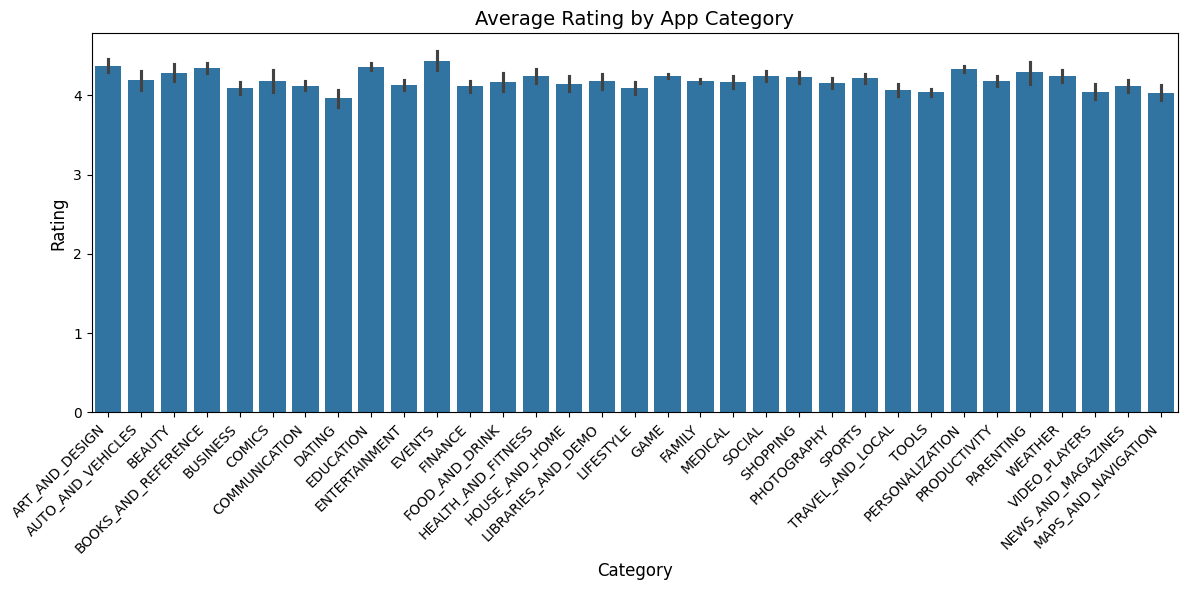

In [118]:
barplot_maker(df, "Category", "Rating", "Average Rating by App Category")

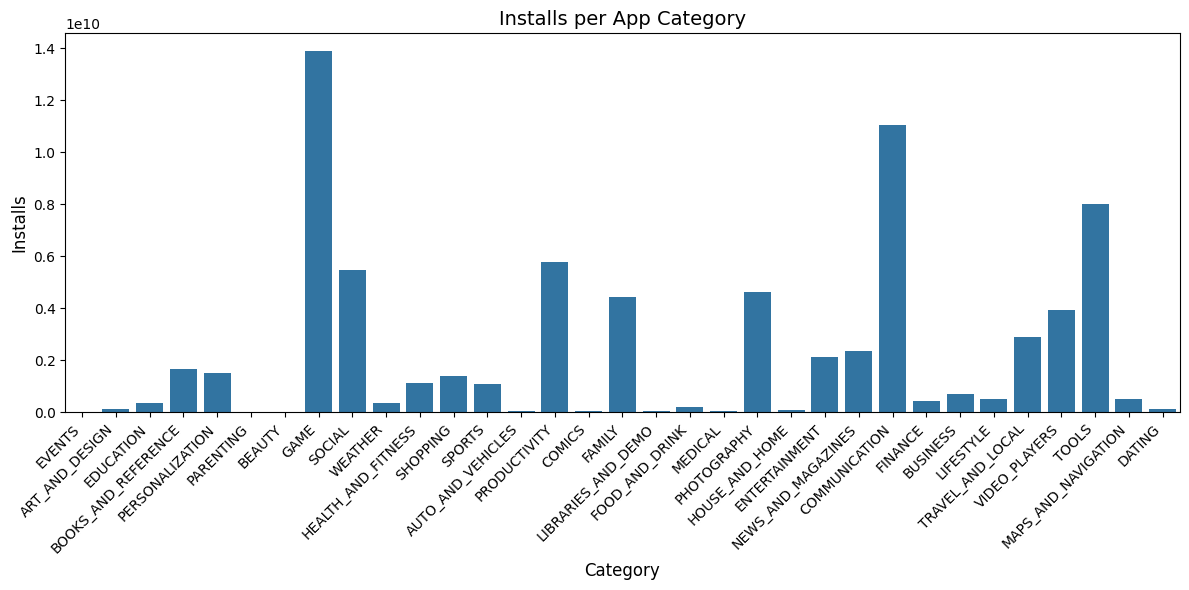

In [119]:
barplot_maker(category_grouped, "Category", "Installs", "Installs per App Category")

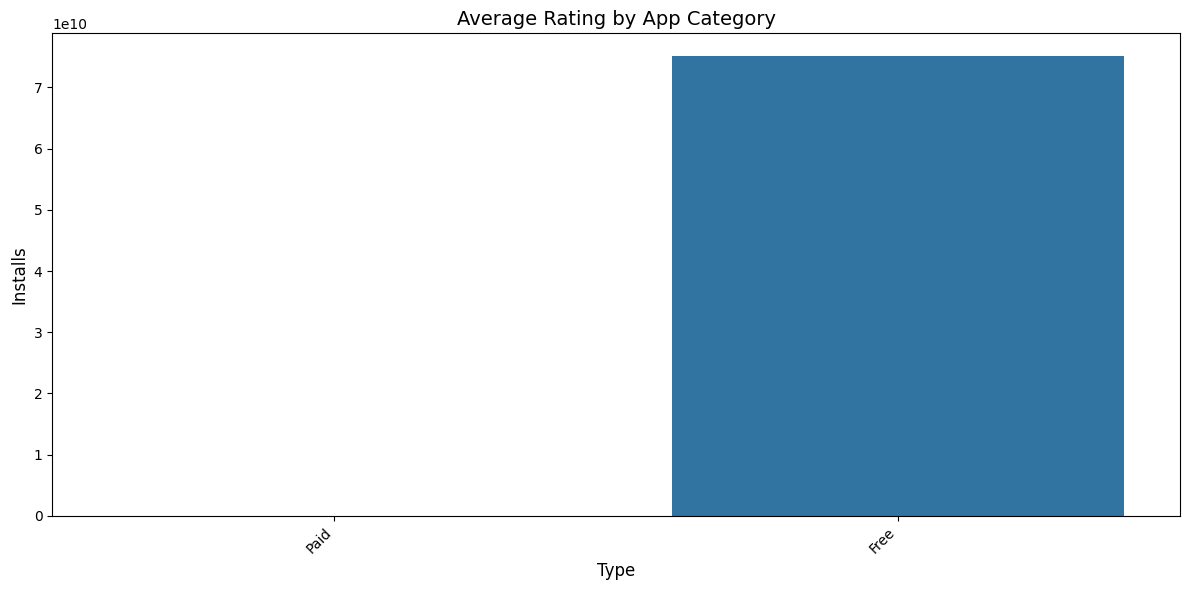

In [120]:
app_category_grouped = df.groupby("Type").agg({"Rating": "mean", "Installs": "sum"}).reset_index()
app_category_grouped.sort_values(by="Rating", ascending=False, inplace=True)

barplot_maker(app_category_grouped, "Type", "Installs", "Average Rating by App Category")


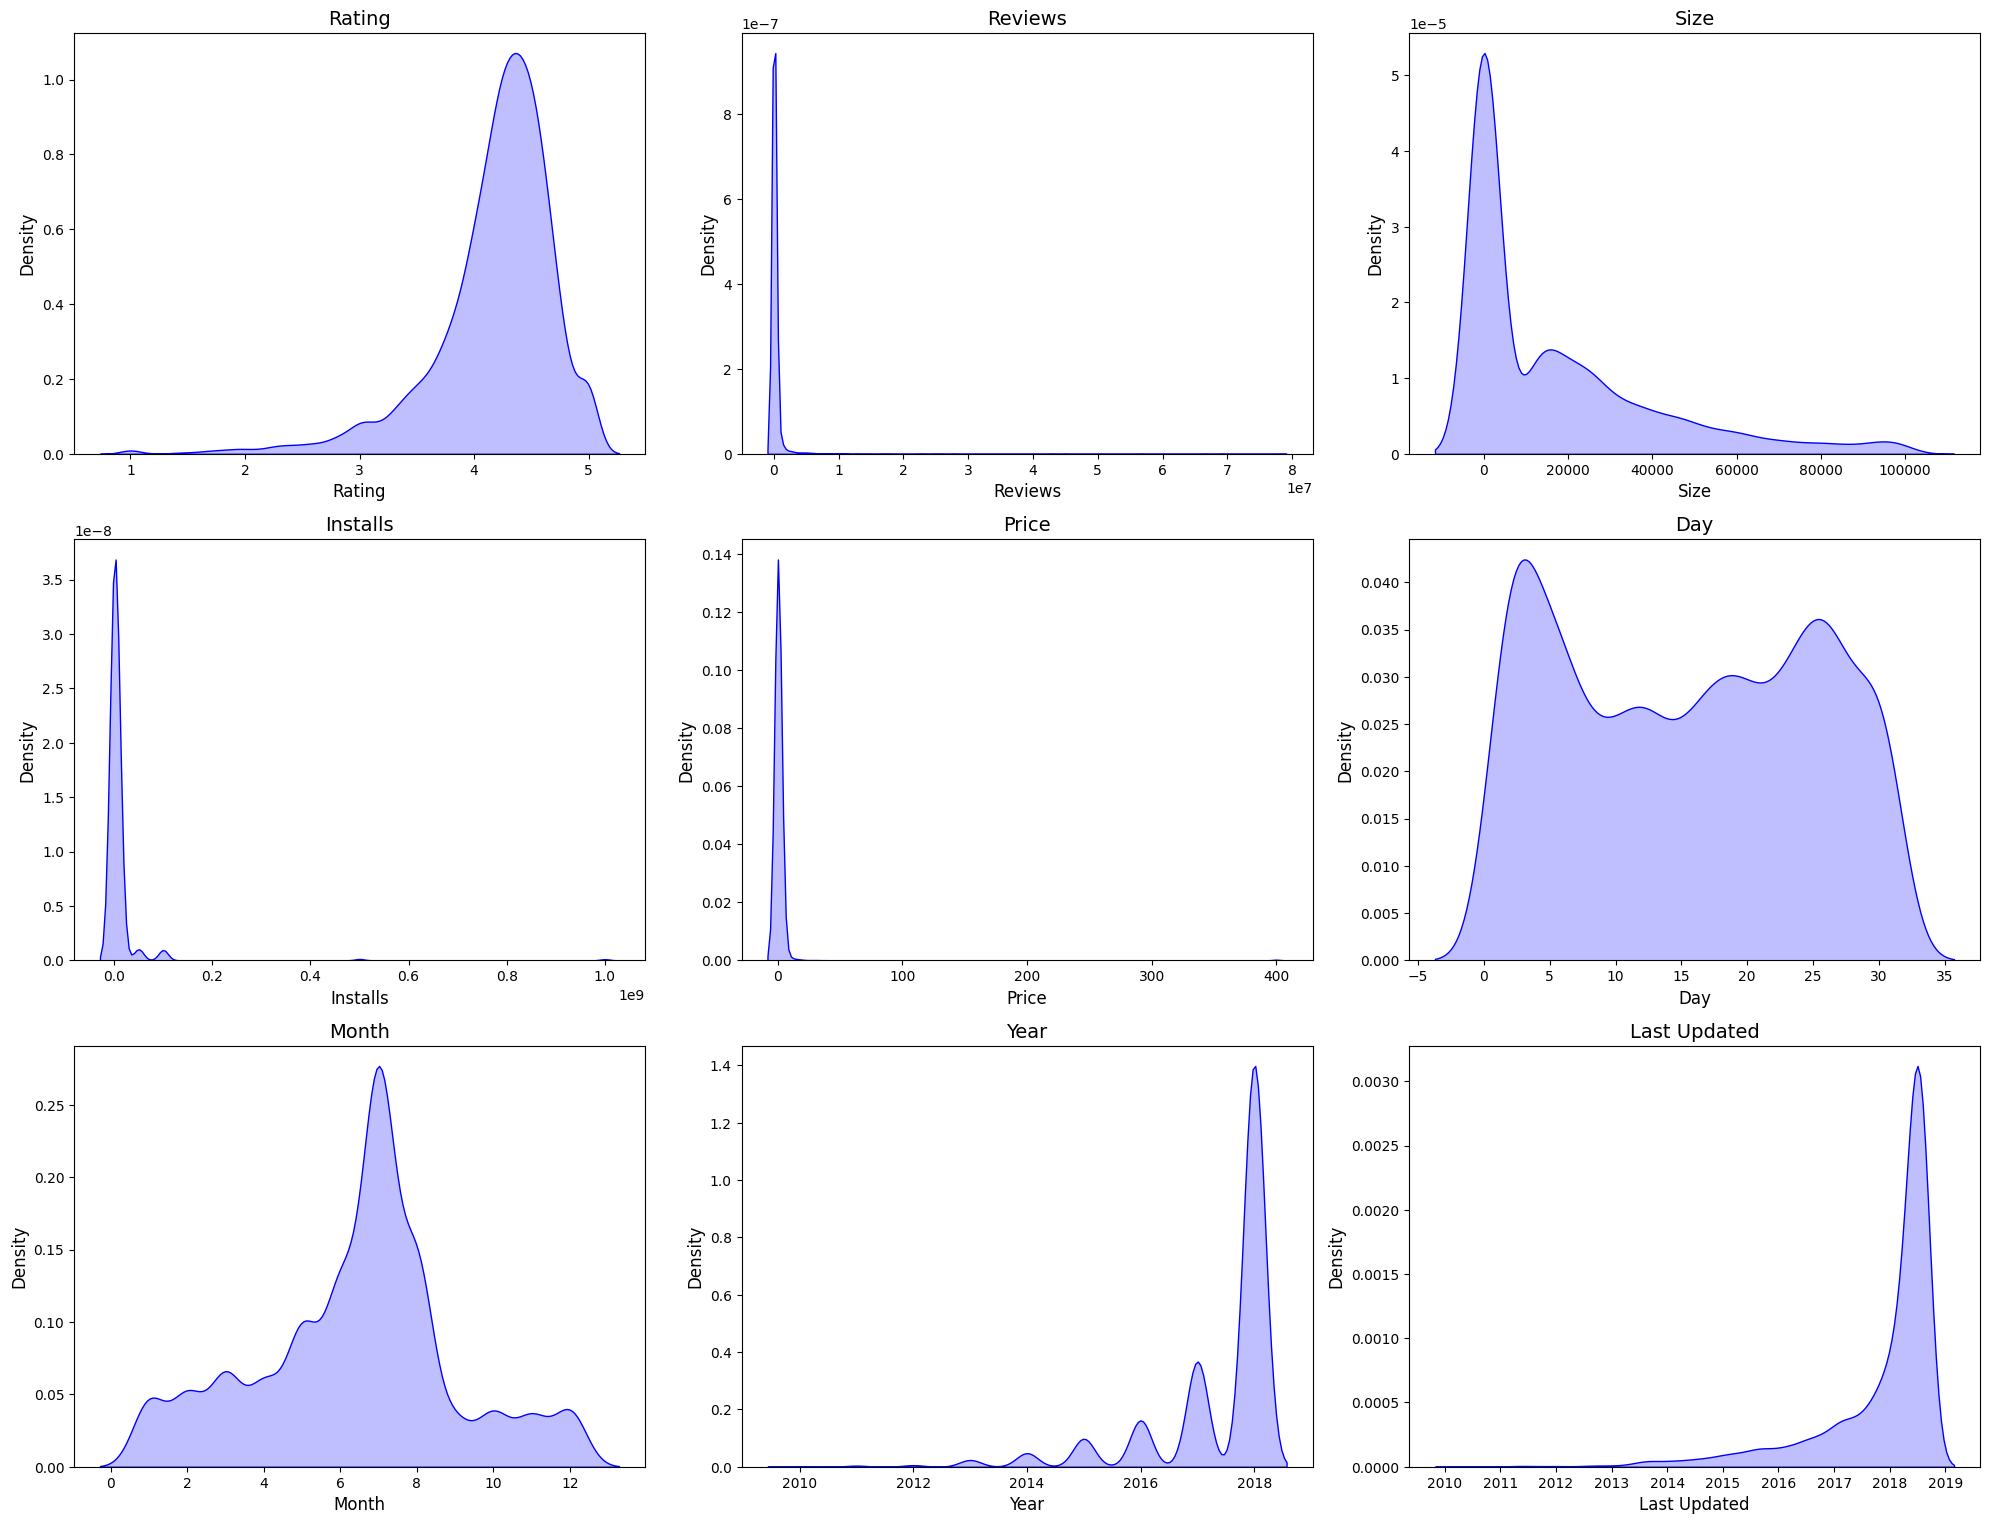

In [143]:
subplot_maker(df, num_cols + ["Day", "Month", "Year", "Last Updated"])

In [155]:
sorted_grouped_cat_and_app

In [171]:
grouped_cat_and_app = df.groupby(["Category", "App"]).agg({"Rating": "mean", "Installs": "sum"}).reset_index()
grouped_cat_and_app.sort_values(by=["Rating", "Installs"], ascending=False, inplace=True)
grouped_cat_and_app.head(5)

cats = ["GAME", "COMMUNICATION", "TOOLS", "PRODUCTIVITY", "SOCIAL"]

for cat in cats:
    print(f"\nTop 5 Most Installed Apps in {cat} Category:")
    filtered_df = grouped_cat_and_app[grouped_cat_and_app["Category"] == cat]
    sorted_by_installs = filtered_df.sort_values(by="Installs", ascending=False)
    print("\nSorted by Installs:")
    print(sorted_by_installs.head())
    
    print(f"\nTop 5 Highest Rated Apps in {cat} Category:")
    sorted_by_rating = filtered_df.sort_values(by="Rating", ascending=False)
    print("\nSorted by Rating:")
    print(sorted_by_rating.head())
    print("\n" + "="*80)



Top 5 Most Installed Apps in GAME Category:

Sorted by Installs:
     Category               App  Rating    Installs
4087     GAME    Subway Surfers     4.5  1000000000
4115     GAME      Temple Run 2     4.3   500000000
3502     GAME  Candy Crush Saga     4.4   500000000
3901     GAME    My Talking Tom     4.5   500000000
3946     GAME               Pou     4.3   500000000

Top 5 Highest Rated Apps in GAME Category:

Sorted by Rating:
     Category                                          App  Rating  Installs
3489     GAME                                    CP Trivia     5.0       100
3886     GAME                             Monster Ride Pro     5.0        10
3686     GAME  Flippy Axe : Flip The Knife & Axe Simulator     5.0       100
3968     GAME                                     Ra Ga Ba     5.0         1
3894     GAME                                      Mu.F.O.     5.0         1


Top 5 Most Installed Apps in COMMUNICATION Category:

Sorted by Installs:
          Category   

In [179]:
df["Android Ver"] = df["Android Ver"].replace("and up", "", regex=True) \
                                     .replace("Varies with device", "0").replace("W", "", regex=True) \
            

In [180]:
df["Android Ver"].unique()

array(['4.0.3 ', '4.2 ', '4.4 ', '2.3 ', '3.0 ', '4.1 ', '4.0 ', '2.3.3 ',
       '0', '2.2 ', '5.0 ', '6.0 ', '1.6 ', '1.5 ', '2.1 ', '7.0 ',
       '4.3 ', '4.0.3 - 7.1.1', '2.0 ', '3.2 ', '5.1 ', '7.1 ',
       '7.0 - 7.1.1', '8.0 ', '5.0 - 8.0', '3.1 ', '2.0.1 ',
       '4.1 - 7.1.1', '5.0 - 6.0', '1.0 '], dtype=object)

In [181]:
df = df[df["Android Ver"].str.contains("-") == False]

In [183]:
df["Android Ver"].value_counts()

Android Ver
4.1       1811
4.0.3     1141
4.0       1040
0          947
4.4        718
2.3        547
5.0        447
4.2        315
2.3.3      232
2.2        203
3.0        201
4.3        185
2.1        112
1.6         87
6.0         42
7.0         41
3.2         31
2.0         27
5.1         16
1.5         15
3.1          8
2.0.1        7
8.0          5
7.1          3
1.0          2
Name: count, dtype: int64

In [185]:
mean_genres_installs = df.groupby("Genres")["Installs"].mean() / 1_000_000

In [188]:
mean_genres_installs = mean_genres_installs.to_dict()

In [189]:
df["Genres Encoded"] = df["Genres"].map(mean_genres_installs)

/var/folders/vw/4mc3r49x4_1419cmr0886y640000gn/T/ipykernel_31951/3788046797.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Genres Encoded"] = df["Genres"].map(mean_genres_installs)


In [190]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year,Genres Encoded
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3,7,1,2018,2.083669
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3,15,1,2018,0.500000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3,1,8,2018,2.083669
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2,8,6,2018,2.083669
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4,20,6,2018,0.285000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2,500,Free,0.0,Everyone,Education,2017-06-18,1.0.0,4.1,18,6,2017,0.602021
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1,25,7,2017,0.602021
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1,6,7,2018,0.602021
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,0,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,0,19,1,2015,9.856755
